<a href="https://colab.research.google.com/github/mmilannaik/Data_Science/blob/master/credit_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip3 install pandas numpy matplotlib seaborn scikit-learn imblearn xgboost

## Loading Required Libraries

In [ ]:
#imported all the Libraries we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
sns.set_style('whitegrid')

#Clasifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Other Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from sklearn.manifold import TSNE

from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

## Data Loading and Understanding

In [ ]:
#imported data
df_loan = pd.read_csv("./data/loan/loan.csv")

df_loan.head(10)

C:\Users\chandrasekhar.baral\AppData\Local\Temp\ipykernel_14732\4268079007.py:2: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("./data/loan/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Look into more details to the data
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [ ]:
#Gathering Info about the data
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
# Get only colomns nedeed
columns = ['loan_amnt','funded_amnt_inv',
           'term','int_rate','installment','grade','emp_length','home_ownership'
           ,'annual_inc','verification_status','purpose', 'loan_status','total_pymnt']

df_data = df_loan[columns]
df_data.tail()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt
887374,10000.0,10000.0,36 months,11.99,332.10,B,8 years,RENT,31000.0,Verified,debt_consolidation,Current,3971.88
887375,24000.0,24000.0,36 months,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,home_improvement,Current,9532.39
887376,13000.0,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,Verified,debt_consolidation,Current,3769.74
887377,12000.0,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,debt_consolidation,Current,3787.67
887378,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,RENT,100000.0,Verified,credit_card,Current,7943.76


## Data Cleaning

In [ ]:
# Check Null Value
df_data.isnull().sum()


loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
purpose                    0
loan_status                0
total_pymnt                0
dtype: int64

In [ ]:
# Since we can't drop null value to annual_inc, otherwise I change fill with 0 value
df_data.loc[:, 'annual_inc'] = df_data.loc[:, 'annual_inc'].fillna(0)
df_data.isnull().sum()


loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
loan_status                0
total_pymnt                0
dtype: int64

we should know that Categories like "Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off" are the onces which are risky



In [ ]:
df_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [ ]:
# Define a function to classify loan status into 0 (safe) or 1 (risky)
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current', 'Issued']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_credit_risk(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category

# Create the 'class' column using the function and .loc
df_data['class'] = df_data['loan_status'].apply(classify_credit_risk)

# Display the updated DataFrame
print(df_data[['loan_status', 'class']])

        loan_status  class
0        Fully Paid      0
1       Charged Off      1
2        Fully Paid      0
3        Fully Paid      0
4           Current      0
...             ...    ...
887374      Current      0
887375      Current      0
887376      Current      0
887377      Current      0
887378      Current      0

[887379 rows x 2 columns]


C:\Users\chandrasekhar.baral\AppData\Local\Temp\ipykernel_14732\658542016.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['class'] = df_data['loan_status'].apply(classify_credit_risk)


In [ ]:
# Since we laready have Class column (clasification from Loan Status), so I drop the 'loan_status'

df_data = df_data.drop('loan_status', axis=1)
df_data.reset_index(drop=True)
df_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,total_pymnt,class
0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,5861.071414,0
1,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,1008.710000,1
2,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,3003.653644,0
3,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,12226.302212,0
4,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,other,3242.170000,0


## EDA (Eploratory Data Analysis)

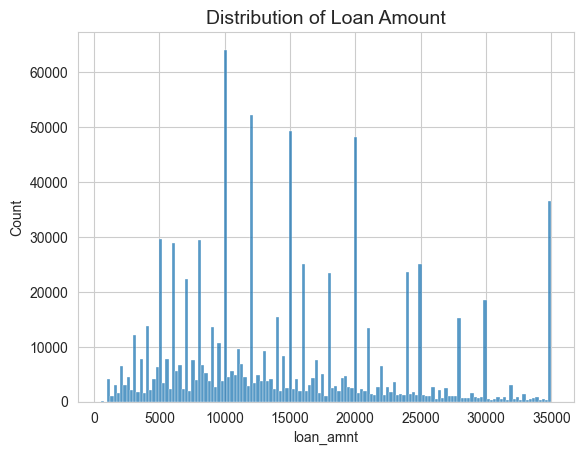

In [ ]:
# Distribution of Loan Amount
sns.histplot(df_data['loan_amnt'])
plt.title('Distribution of Loan Amount', fontsize=14)
plt.show()

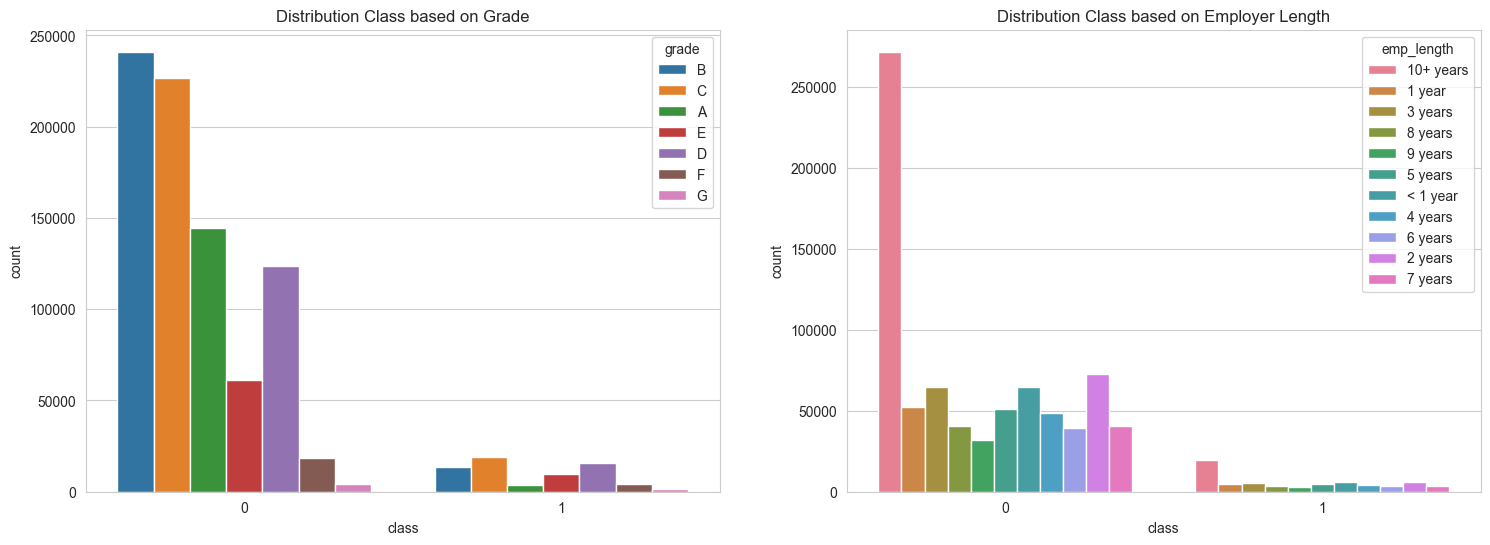

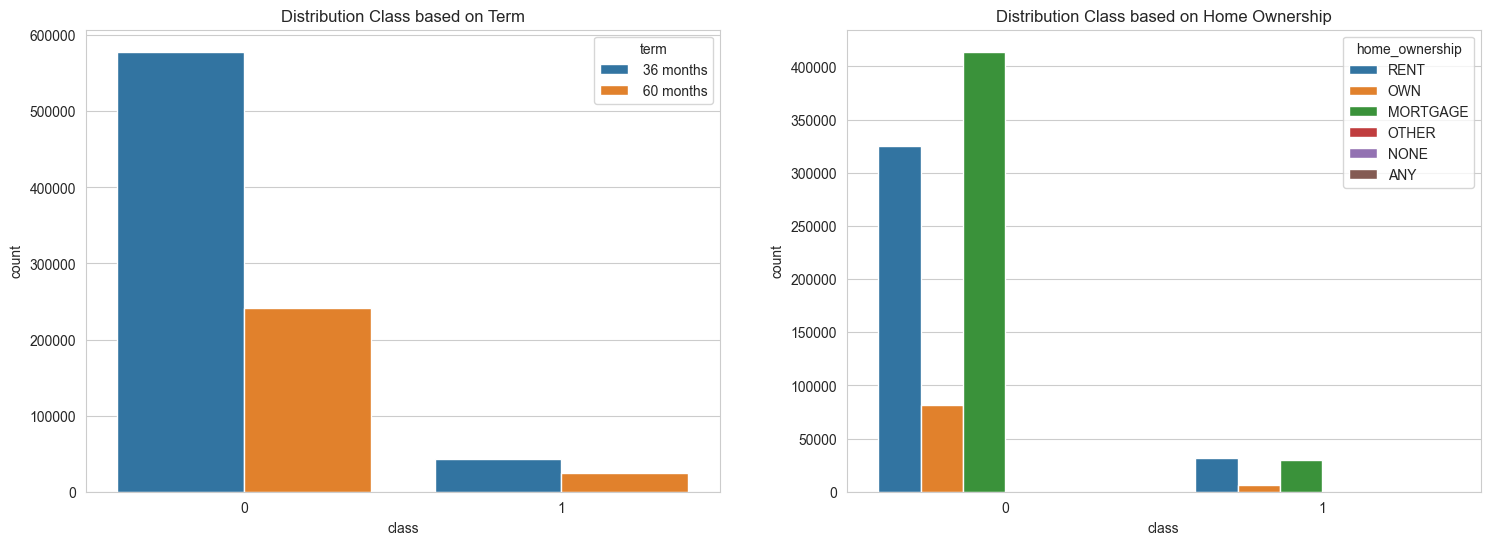

In [ ]:
def plot_count_by_class(df, x_column, hue_column, title):
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))
    sns.countplot(data=df, x='class', hue=hue_column[0], ax=ax[0])
    ax[0].set_title(title[0])

    sns.countplot(data=df, x='class', hue=hue_column[1], ax=ax[1])
    ax[1].set_title(title[1])

    plt.show()

# Assuming you have already defined df_predic DataFrame
plot_count_by_class(df_data, x_column='class', hue_column=['grade', 'emp_length'], title=["Distribution Class based on Grade", "Distribution Class based on Employer Length"])
plot_count_by_class(df_data, x_column='class', hue_column=['term', 'home_ownership'], title=["Distribution Class based on Term", "Distribution Class based on Home Ownership"])

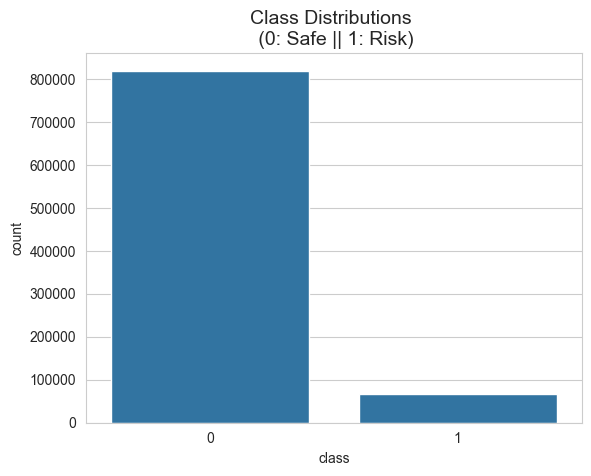

In [ ]:
# Check Imbalance Data

sns.countplot(x='class', data=df_data)
plt.title('Class Distributions \n (0: Safe || 1: Risk)', fontsize=14)
plt.show()

## Data Prepocessing

In [ ]:
def apply_label_encoding(column):
    labelencoder = LabelEncoder()
    return labelencoder.fit_transform(column)

columns_to_encode = ['term','grade', 'emp_length', 'home_ownership','purpose','verification_status']
df_data[columns_to_encode] = df_data[columns_to_encode].apply(apply_label_encoding)
df_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,total_pymnt,class
0,5000.0,4975.0,0,10.65,162.87,1,1,5,24000.0,2,1,5861.071414,0
1,2500.0,2500.0,1,15.27,59.83,2,10,5,30000.0,1,0,1008.710000,1
2,2400.0,2400.0,0,15.96,84.33,2,1,5,12252.0,0,11,3003.653644,0
3,10000.0,10000.0,0,13.49,339.31,2,1,5,49200.0,1,9,12226.302212,0
4,3000.0,3000.0,1,12.69,67.79,1,0,5,80000.0,1,9,3242.170000,0


In [ ]:
target_correlations = df_data.corr()['class'].apply(abs).sort_values()

In [ ]:
target_correlations

funded_amnt_inv        0.000007
loan_amnt              0.003512
installment            0.014124
emp_length             0.016133
annual_inc             0.034141
home_ownership         0.036104
term                   0.039591
purpose                0.042437
total_pymnt            0.042515
verification_status    0.044306
grade                  0.150291
int_rate               0.175450
class                  1.000000
Name: class, dtype: float64

## Spliting DataFrame

In [ ]:
X = df_data.drop('class', axis=1)
y = df_data['class']
print(X.shape, y.shape)

(887379, 12) (887379,)


#### RobustScaler():
By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)

# imputer = SimpleImputer()
# x_scaled = imputer.fit_transform(x_scaled)
# y = imputer.fit_transform(np.array([y]))[0]
print(x_scaled.shape, y.shape)

(887379, 12) (887379,)


Splitting into Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

#### To address imbalanced classification - over-sampling and under-sampling technique used:
Smote - Synthesizing elements for the minority class. It works by randomly picking a point from the minority class and computing K-Nearest Neighbors.¶
Tomek - Pairs of very close instances, but of opposite classes. Removing the instances of majority class.
Combining this over-sampling and under-sampling technique, we can balance the target class.

In [ ]:
from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=0)

# fit and apply the transform
X_underT, y_underT = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_underT)))

The number of classes before fit Counter({0: 656014, 1: 53889})
The number of classes after fit Counter({0: 651682, 1: 651682})


### Random Forest Classifier Model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_underT,y_underT)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_pred, y_test)
print("Test score:", np.round(test_score,2))

Test score: 0.93


### Confusion Matrix for Random Forest Classification

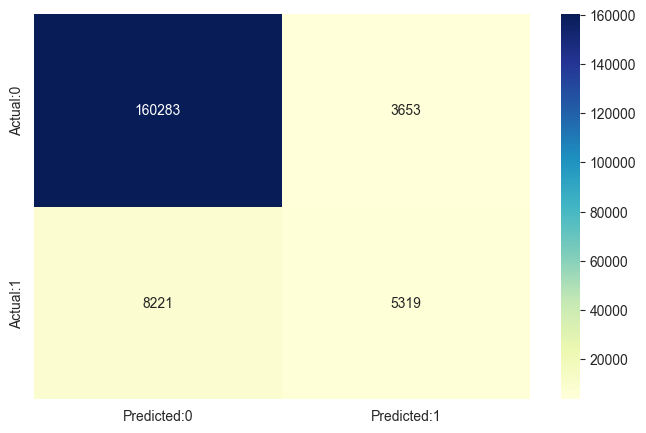

In [ ]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### Classification Report:

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    163936
           1       0.59      0.39      0.47     13540

    accuracy                           0.93    177476
   macro avg       0.77      0.69      0.72    177476
weighted avg       0.92      0.93      0.93    177476



### ROC-AUC:

Logistic: ROC AUC= 0.6852764776382814


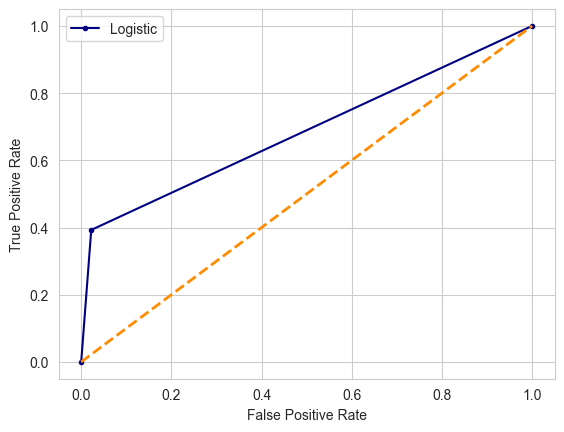

In [ ]:
from sklearn.metrics import roc_curve

lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('Logistic: ROC AUC=', (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic', color='navy')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Grid Search on RFC

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_underT, y_underT)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
# Step 1: Retrieve the best parameters

best_params = grid_search.best_params_  # or random_search.best_params_

print("Best parameters found: ", best_params)

# Step 2: Initialize the model with best parameters

best_rf = RandomForestClassifier(**best_params)

# Step 3: Fit the model on the training data

best_rf.fit(X_underT, y_underT)

# Step 4: Evaluate the model

accuracy = best_rf.score(X_test, y_test)

print("Accuracy on test set: ", accuracy)

# Optional: Further evaluation using confusion matrix, classification report, etc.

from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



### RFC-Model Saving
Now, let's save the model in a pickle file.

In [ ]:
import pickle
path = r'./model/model-RFC.pickle'
with open(path, 'wb' ) as file:
    pickle.dump(classifier,file)

### Predict the Probability of Risk Using Random Forest Classifier

In [ ]:
# Assuming clf is your trained classifier model
import pickle

# Load the trained model
with open('./model/model-RFC.pickle', 'rb') as f:
    RFclf = pickle.load(f)


RFC_predictions = RFclf.predict_proba(X_test)


pd.DataFrame(RFC_predictions)

,0,1
0,0.99,0.01
1,0.91,0.09
2,0.97,0.03
3,0.89,0.11
4,0.93,0.07
...,...,...
177471,0.90,0.10
177472,0.87,0.13
177473,1.00,0.00
177474,0.93,0.07


### XGBoost Model:

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        use_label_encoder = False,
                        eval_metric = "logloss",
                        early_stopping_rounds = 5,
                        n_jobs = -1)

In [ ]:
xgb_clf.fit(X_underT, y_underT,
            eval_set = [(X_test,y_test)],
            verbose = False)

c:\Users\chandrasekhar.baral\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:53:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

pred_test = xgb_clf.predict(X_test)
test_score = accuracy_score(pred_test, y_test)
print("Test score:", np.round(test_score,2))

Test score: 0.91


### Confusion Matrix for XGBoost Classification

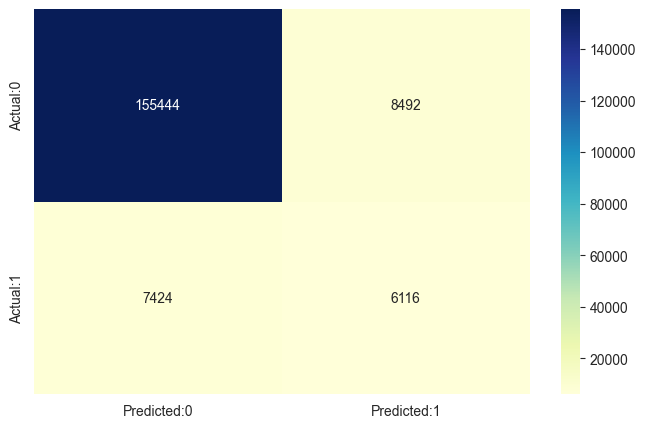

In [ ]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### Classification Report:

In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    163936
           1       0.42      0.45      0.43     13540

    accuracy                           0.91    177476
   macro avg       0.69      0.70      0.69    177476
weighted avg       0.91      0.91      0.91    177476



### ROC-AUC:

Logistic: ROC AUC= 0.6852764776382814


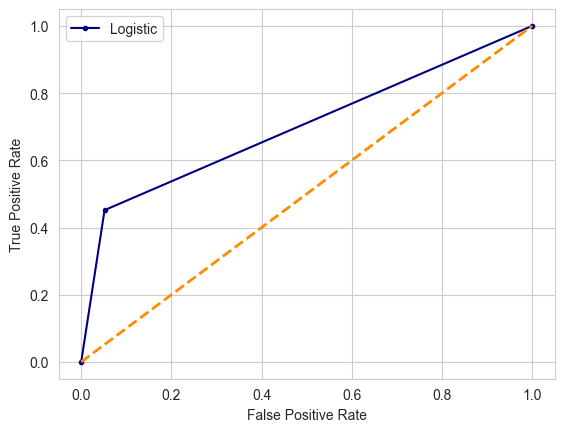

In [ ]:
from sklearn.metrics import roc_curve

lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('Logistic: ROC AUC=', (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_test)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic', color='navy')
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### XGBoost-Model Saving
Now, let's save the model in a pickle file.

In [ ]:
import pickle
path = r'./model/model-XGB.pickle'
with open(path, 'wb' ) as file:
    pickle.dump(xgb_clf,file)

### Predict the Probability of Risk Using XGBoost Classifier

In [ ]:
import pickle

# Load the trained model
with open('./model/model-XGB.pickle', 'rb') as f:
    XGBclf = pickle.load(f)


XGB_predictions = XGBclf.predict_proba(X_test)


pd.DataFrame(XGB_predictions)

,0,1
0,0.972528,0.027472
1,0.867804,0.132196
2,0.962246,0.037754
3,0.769953,0.230047
4,0.828539,0.171461
...,...,...
177471,0.789023,0.210977
177472,0.819452,0.180548
177473,0.911630,0.088370
177474,0.859306,0.140694
